# COMP309 - Machine Learning 
## Elliott Rose - 300540768
### Assignment 1 

Test out classification and clustering algorithms using: 
* python
* numpy
* matplotlib
* scikit-learn

### Classification [70 marks]

The part of assignment is to explore several classifiers in scikit-learn and investigate the hyperparameter for complexity control for each of these classifiers on three datasets by setting the hyperparameter to a range of plausible values and seeing how well it does on ”held out” data. 

To do this you will need "train_test_split" from scikit-learn. To get better estimates, simply repeat 50 times with different random splits (set the seed to get reproducible results). For simplicity, use a 50:50 train:test split in all cases. For each setting of the hyperparameter, you then have a distribution over 50 different classification accuracies on the test set. 

A nice way to visualise these scores is to produce a box plot where the x-axis gives options for a parameter of the model, while the y-axis indicates the spread for classification accuracies of the classifier. Titles and Axis Labels are needed for clarity

#### Scikit-learn classifiers:
* KNeighborsClassifier (K nearest neighbours)
* GaussianNB (the Gaussian form of Naive Bayes)
* DecisionTreeClassifier (A decision tree (DT))
* LogisticRegression (essentially, a perceptron)
* GradientBoostingClassifier (Gradient Boosted DTs)
* RandomForestClassifier (Random Forest)
* MLPClassifier (Neural Network)

#### Datasets:
You will need to test the models on the following three datasets:
* steel-plates-fault
* ionosphere
* banknotes

#### Tasks:
* [ ] Build a 7-by-3 (7 classifiers and 3 datasets) table to present the boxplots on the classifier accuracy versus parameter values (as the example table below). It probably won’t fit into one summary figure. You should structure it as separate main plots, one per classifier, each consisting of several subplots for different datasets.

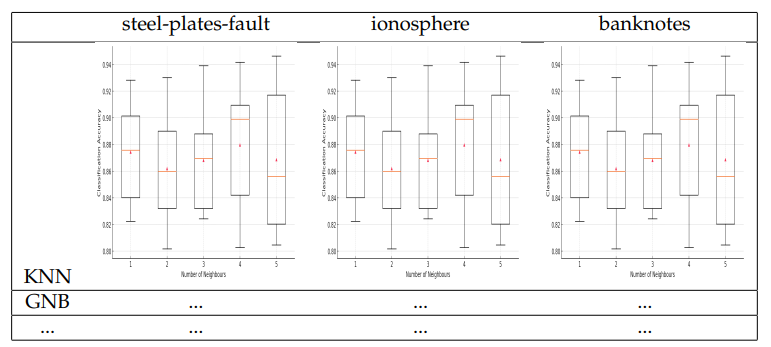

You need to consider the parameter and the corresponding values for each classifier as shown in Table i. Other hyperparameters should be left as default.

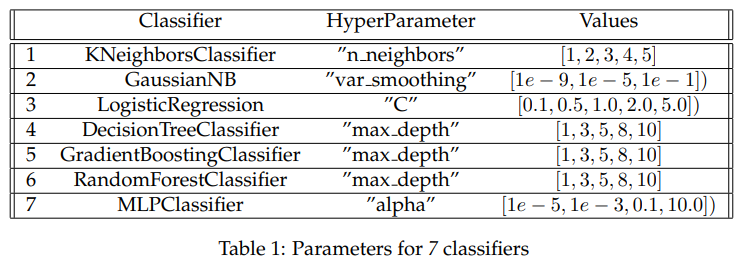

* [ ] Present two summary tables, with rows being classifiers, and columns being datasets. Table (1) is to contain the lowest mean value of the test errors obtained from each classifier with various hyperparameter settings. Table (2) is to contain the corresponding hyperparameter values for obtaining the best test errors.
* [ ] Write a paragraph to compare and analyse the overall results as captured in these two tables including which model has the best performance and why, and how sensitive these models are to the complexity control hyperparameter.

### Setup

In [43]:
# standard imports
import matplotlib as plt
import matplotlib.pyplot as pyplot
import numpy as np
import pandas as pd
import os

# other imports
from sklearn import preprocessing
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score as accuracy_score
from sklearn.model_selection import train_test_split
from scipy.io import arff
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import AffinityPropagation, Birch, MeanShift, KMeans, AgglomerativeClustering, DBSCAN
from sklearn.datasets import make_blobs, make_classification, make_circles

# Importing the 7 classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

### Processing data

In [136]:
min_max_scaler = preprocessing.MinMaxScaler()

# parsing the data and getting the 0th index 
ionosphere_data = pd.DataFrame(arff.loadarff('ionosphere.arff')[0])
ionosphere_data_x = ionosphere_data.iloc[:,:-1]
ionosphere_data_y = ionosphere_data.iloc[:,-1]

bank_notes_data = pd.DataFrame(arff.loadarff('banknote-authentication.arff')[0])
bank_notes_data_x = bank_notes_data.iloc[:,:-1]
bank_notes_data_y = bank_notes_data.iloc[:,-1]

steel_plates_data = pd.DataFrame(arff.loadarff('steel-plates-fault.arff')[0])
steel_plates_data_x = steel_plates_data.iloc[:,:-1]
steel_plates_data_y = steel_plates_data.iloc[:,-1]

graph_list1 = []
data_x = []
resres = []
knn_mean_err, GNB_mean_err, DT_mean_err, logreg_mean_err, GB_mean_err, RF_mean_err, MLP_mean_err = [], [], [], [], [], [], []

### KNN

In [71]:
def knn(xdata, ydata):
    le = LabelEncoder()
    encodedY = le.fit_transform(ydata)
    res = []
    lowesterrs = []
    meanerr = 0
    for k in range(1,6):
        scores = []
        test_errs = []
        lowest = 1000
        for i in range(1,51):
            x_train, x_test, y_train, y_test = train_test_split(xdata, encodedY, test_size = 0.5, random_state = 42 + i)
            ypred = KNeighborsClassifier(n_neighbors = k).fit(x_train, y_train).predict(x_test)
            acc = accuracy_score(y_test, ypred)
            test_error = 1.0 - acc
            test_errs.append(test_error)
            scores.append(acc)
        res.append(scores)
        for err in test_errs:
            if (err < lowest):
                lowest = err
        lowesterrs.append(lowest)
    pyplot.boxplot(res)
    resres.append(res)
    graph_list1.append(pyplot.gcf()) 
    pyplot.ylabel('Accuracy')
    pyplot.show
    for err in lowesterrs:
        meanerr += err
    meanerr = meanerr/len(lowesterrs)
    print(meanerr) 
    print(lowesterrs)
    knn_mean_err.append(meanerr)

0.09886363636363638
[0.08522727272727271, 0.06818181818181823, 0.11363636363636365, 0.10227272727272729, 0.125]
0.3522142121524202
[0.37281153450051496, 0.34809474768280124, 0.3573635427394438, 0.33676622039134907, 0.34603501544799176]
0.0
[0.0, 0.0, 0.0, 0.0, 0.0]


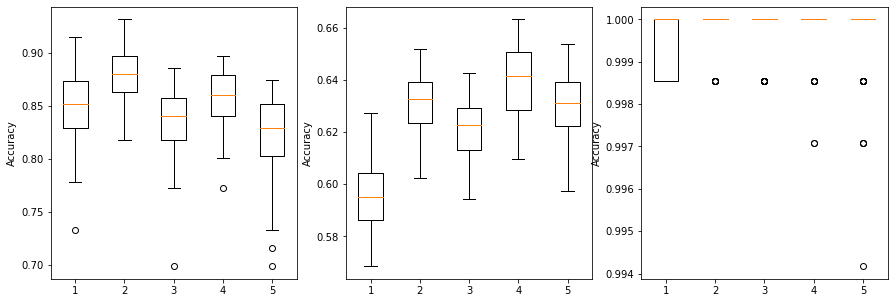

In [116]:
# 1x3 grid of subplots
fig, axes = pyplot.subplots(1, 3, figsize=(15, 5))

# Call knn function three times, each time plotting in a different subplot
for i in range(3):
    pyplot.sca(axes[i])
    
    if i == 0:
        knn(ionosphere_data_x, ionosphere_data_y)
    if i == 1:
        knn(steel_plates_data_x, steel_plates_data_y)
    if i == 2:
        knn(bank_notes_data_x, bank_notes_data_y)

### GaussianNB

In [25]:
def gnb(xdata, ydata):
    gnbHyperparameters = [1.9 * (10**-9), 1.9 * (10**-5), 1.9 * (10**-1)]
    le = LabelEncoder()
    encodedY = le.fit_transform(ydata)
    res = []
    lowesterrs = []
    meanerr = 0
    for k in gnbHyperparameters:
        scores = []
        test_errs = []
        lowest = 1000
        for i in range(1,51):
            x_train, x_test, y_train, y_test = train_test_split(xdata, encodedY, test_size = 0.5, random_state = 42 + i)
            ypred = GaussianNB(var_smoothing = k).fit(x_train, y_train).predict(x_test)
            acc = accuracy_score(y_test, ypred)
            test_error = 1.0 - acc
            test_errs.append(test_error)
            scores.append(acc)
        res.append(scores)
        for err in test_errs:
            if (err < lowest):
                lowest = err
        lowesterrs.append(lowest)
    pyplot.boxplot(res)
    resres.append(res)
    graph_list1.append(pyplot.gcf()) 
    pyplot.ylabel('Accuracy')
    pyplot.show
    for err in lowesterrs:
        meanerr += err
    meanerr = meanerr/len(lowesterrs)
    print(meanerr) 
    print(lowesterrs)
    GNB_mean_err.append(meanerr)

0.06628787878787878
[0.07386363636363635, 0.051136363636363646, 0.07386363636363635]
0.39100583590799864
[0.470648815653965, 0.37796086508753857, 0.32440782698249226]
0.14237123420796893
[0.13265306122448983, 0.13265306122448983, 0.16180758017492713]


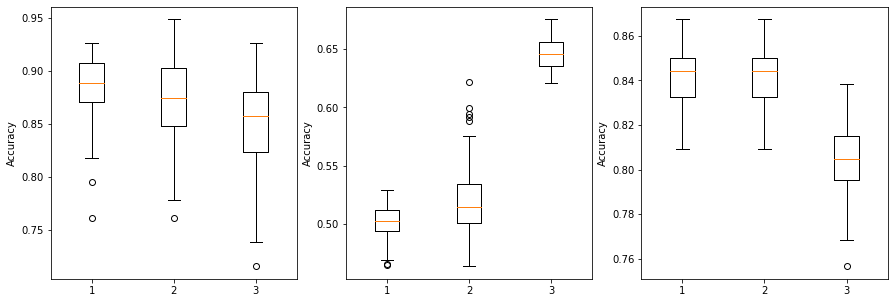

In [117]:
fig, axes = pyplot.subplots(1, 3, figsize=(15, 5))

for i in range(3):
    pyplot.sca(axes[i])
    
    if i == 0:
        gnb(ionosphere_data_x, ionosphere_data_y)
    if i == 1:
        gnb(steel_plates_data_x, steel_plates_data_y)
    if i == 2:
        gnb(bank_notes_data_x, bank_notes_data_y)

### Decision Tree 

In [27]:
def dt(xdata, ydata):
    dtHyperparameters = [1, 3, 5, 8, 10]
    le = LabelEncoder()
    encodedY = le.fit_transform(ydata)
    res = []
    lowesterrs = []
    meanerr = 0
    for k in dtHyperparameters:
        scores = []
        test_errs = []
        lowest = 1000
        for i in range(1,51):
            x_train, x_test, y_train, y_test = train_test_split(xdata, encodedY, test_size = 0.5, random_state = 42 + i)
            ypred = DecisionTreeClassifier(max_depth = k).fit(x_train, y_train).predict(x_test)
            acc = accuracy_score(y_test, ypred)
            test_error = 1.0 - acc
            test_errs.append(test_error)
            scores.append(acc)
        res.append(scores)
        for err in test_errs:
            if (err < lowest):
                lowest = err
        lowesterrs.append(lowest)
    pyplot.boxplot(res)
    resres.append(res)
    graph_list1.append(pyplot.gcf()) 
    pyplot.ylabel('Accuracy')
    pyplot.show
    for err in lowesterrs:
        meanerr += err
    meanerr = meanerr/len(lowesterrs)
    print(meanerr) 
    print(lowesterrs)
    DT_mean_err.append(meanerr)

0.08068181818181822
[0.13068181818181823, 0.07954545454545459, 0.06818181818181823, 0.0625, 0.0625]
0.09454170957775491
[0.31616889804325443, 0.13182286302780644, 0.02471678681771372, 0.0, 0.0]
0.04110787172011663
[0.13265306122448983, 0.04810495626822153, 0.010204081632653073, 0.007288629737609353, 0.007288629737609353]


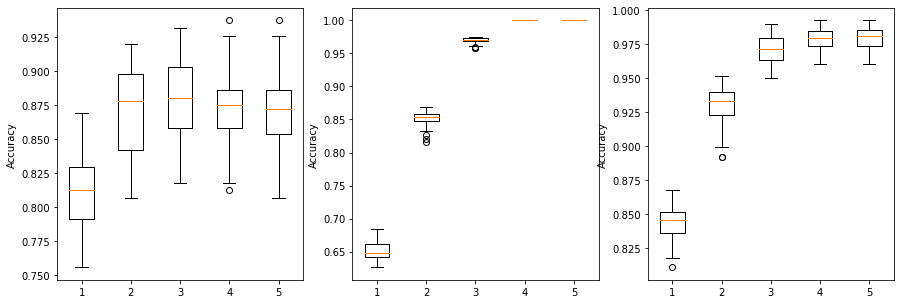

In [118]:
fig, axes = pyplot.subplots(1, 3, figsize=(15, 5))

for i in range(3):
    pyplot.sca(axes[i])
        
    if i == 0:
        dt(ionosphere_data_x, ionosphere_data_y)
    if i == 1:
        dt(steel_plates_data_x, steel_plates_data_y)
    if i == 2:
        dt(bank_notes_data_x, bank_notes_data_y)

### Logistic regression

In [38]:
def logreg(xdata, ydata):
    logregHyperparameters = [0.1, 0.5, 1, 2, 5]
    le = LabelEncoder()
    encodedY = le.fit_transform(ydata)
    res = []
    lowesterrs = []
    meanerr = 0
    for k in logregHyperparameters:
        scores = []
        test_errs = []
        lowest = 1000
        for i in range(1,51):
            x_train, x_test, y_train, y_test = train_test_split(xdata, encodedY, test_size = 0.5, random_state = 42 + i)
            ypred = LogisticRegression(C = k).fit(x_train, y_train).predict(x_test)
            acc = accuracy_score(y_test, ypred)
            test_error = 1.0 - acc
            test_errs.append(test_error)
            scores.append(acc)
        res.append(scores)
        for err in test_errs:
            if (err < lowest):
                lowest = err
        lowesterrs.append(lowest)
    pyplot.boxplot(res)
    resres.append(res)
    graph_list1.append(pyplot.gcf()) 
    pyplot.ylabel('Accuracy')
    pyplot.show
    for err in lowesterrs:
        meanerr += err
    meanerr = meanerr/len(lowesterrs)
    print(meanerr) 
    print(lowesterrs)
    logreg_mean_err.append(meanerr)

0.09090909090909091
[0.10227272727272729, 0.09090909090909094, 0.09659090909090906, 0.07954545454545459, 0.08522727272727271]


C:\Users\ellio\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ellio\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\ellio\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ellio\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\ellio\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ellio\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\ellio\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ellio\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

0.29186405767250256
[0.29248197734294545, 0.29454170957775494, 0.2914521112255407, 0.2893923789907312, 0.2914521112255407]
0.005247813411078717
[0.010204081632653073, 0.002915451895043719, 0.004373177842565634, 0.005830903790087438, 0.002915451895043719]


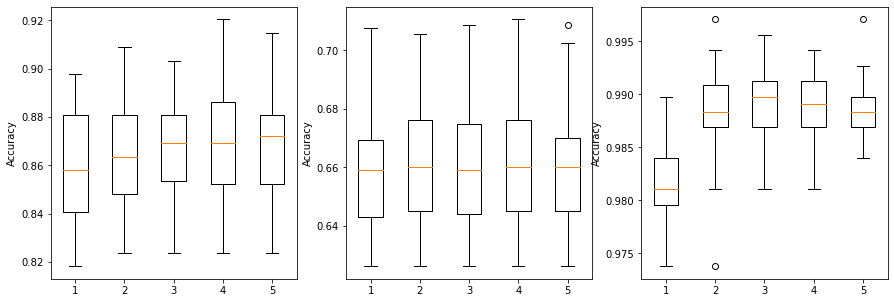

In [120]:
fig, axes = pyplot.subplots(1, 3, figsize=(15, 5))

for i in range(3):
    pyplot.sca(axes[i])
    
    if i == 0:
        logreg(ionosphere_data_x, ionosphere_data_y)
    if i == 1:
        logreg(steel_plates_data_x, steel_plates_data_y)
    if i == 2:
        logreg(bank_notes_data_x, bank_notes_data_y)

### Gradient boosting 

In [39]:
def gradBoost(xdata, ydata):
    gradBoostHyperparameters = [1, 3, 5, 8, 10]
    le = LabelEncoder()
    encodedY = le.fit_transform(ydata)
    res = []
    lowesterrs = []
    meanerr = 0
    for k in gradBoostHyperparameters:
        scores = []
        test_errs = []
        lowest = 1000
        for i in range(1,51):
            x_train, x_test, y_train, y_test = train_test_split(xdata, encodedY, test_size = 0.5, random_state = 42 + i)
            ypred = GradientBoostingClassifier(max_depth = k).fit(x_train, y_train).predict(x_test)
            acc = accuracy_score(y_test, ypred)
            test_error = 1.0 - acc
            test_errs.append(test_error)
            scores.append(acc)
        res.append(scores)
        for err in test_errs:
            if (err < lowest):
                lowest = err
        lowesterrs.append(lowest)
    pyplot.boxplot(res)
    resres.append(res)
    graph_list1.append(pyplot.gcf()) 
    pyplot.ylabel('Accuracy')
    pyplot.show
    for err in lowesterrs:
        meanerr += err
    meanerr = meanerr/len(lowesterrs)
    print(meanerr) 
    print(lowesterrs)
    GB_mean_err.append(meanerr)

0.05227272727272727
[0.045454545454545414, 0.045454545454545414, 0.051136363636363646, 0.06818181818181823, 0.051136363636363646]
0.0
[0.0, 0.0, 0.0, 0.0, 0.0]
0.006122448979591822
[0.011661807580174877, 0.001457725947521915, 0.002915451895043719, 0.005830903790087438, 0.008746355685131157]


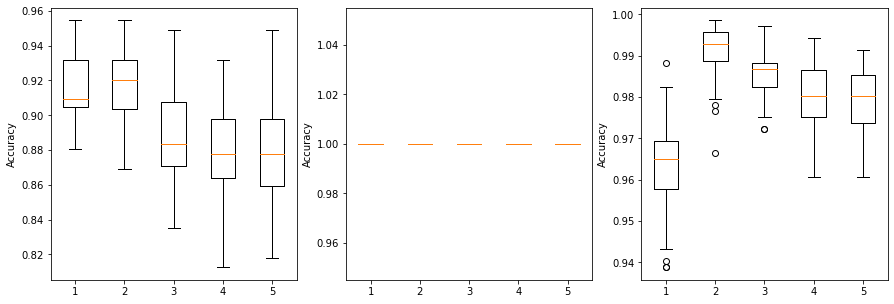

In [122]:
fig, axes = pyplot.subplots(1, 3, figsize=(15, 5))

for i in range(3):
    pyplot.sca(axes[i])
    
    if i == 0:
        gradBoost(ionosphere_data_x, ionosphere_data_y)
    if i == 1:
        gradBoost(steel_plates_data_x, steel_plates_data_y)
    if i == 2:
        gradBoost(bank_notes_data_x, bank_notes_data_y)

### Random forest 

In [40]:
def ranFor(xdata, ydata):
    ranForHyperparameters = [1, 3, 5, 8, 10]
    le = LabelEncoder()
    encodedY = le.fit_transform(ydata)
    res = []
    lowesterrs = []
    meanerr = 0
    for k in ranForHyperparameters:
        scores = []
        test_errs = []
        lowest = 1000
        for i in range(1,51):
            x_train, x_test, y_train, y_test = train_test_split(xdata, encodedY, test_size = 0.5, random_state = 42 + i)
            ypred = RandomForestClassifier(max_depth = k).fit(x_train, y_train).predict(x_test)
            acc = accuracy_score(y_test, ypred)
            test_error = 1.0 - acc
            test_errs.append(test_error)
            scores.append(acc)
        res.append(scores)
        for err in test_errs:
            if (err < lowest):
                lowest = err
        lowesterrs.append(lowest)
    pyplot.boxplot(res)
    resres.append(res)
    graph_list1.append(pyplot.gcf()) 
    pyplot.ylabel('Accuracy')
    pyplot.show
    for err in lowesterrs:
        meanerr += err
    meanerr = meanerr/len(lowesterrs)
    print(meanerr) 
    print(lowesterrs)
    RF_mean_err.append(meanerr)

0.05681818181818179
[0.09659090909090906, 0.051136363636363646, 0.045454545454545414, 0.045454545454545414, 0.045454545454545414]
0.08403707518022659
[0.3079299691040165, 0.08444902162718848, 0.015447991761071034, 0.006179196704428458, 0.006179196704428458]
0.02507288629737612
[0.09183673469387754, 0.026239067055393583, 0.004373177842565634, 0.001457725947521915, 0.001457725947521915]


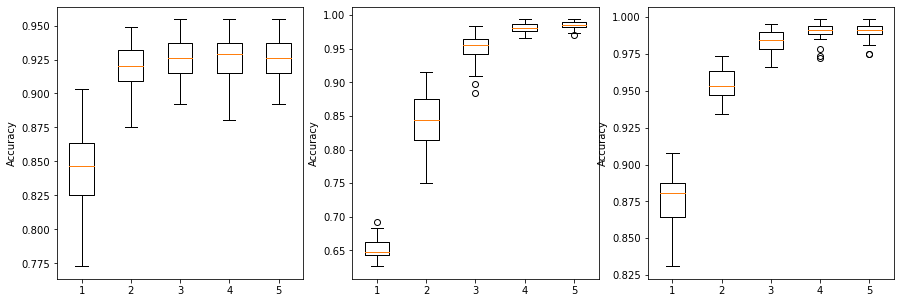

In [124]:
fig, axes = pyplot.subplots(1, 3, figsize=(15, 5))

for i in range(3):
    pyplot.sca(axes[i])
    
    if i == 0:
        ranFor(ionosphere_data_x, ionosphere_data_y)
    if i == 1:
        ranFor(steel_plates_data_x, steel_plates_data_y)
    if i == 2:
        ranFor(bank_notes_data_x, bank_notes_data_y)

### MLP

In [41]:
def mlp(xdata, ydata):
    mlpHyperparameters = [1e-5, 1e-3, 0.1, 10]
    le = LabelEncoder()
    encodedY = le.fit_transform(ydata)
    res = []
    lowesterrs = []
    meanerr = 0
    for k in mlpHyperparameters:
        scores = []
        test_errs = []
        lowest = 1000
        for i in range(1,51):
            x_train, x_test, y_train, y_test = train_test_split(xdata, encodedY, test_size = 0.5, random_state = 42 + i)
            ypred = MLPClassifier(alpha = k).fit(x_train, y_train).predict(x_test)
            acc = accuracy_score(y_test, ypred)
            test_error = 1.0 - acc
            test_errs.append(test_error)
            scores.append(acc)
        res.append(scores)
        for err in test_errs:
            if (err < lowest):
                lowest = err
        lowesterrs.append(lowest)
    pyplot.boxplot(res)
    resres.append(res)
    graph_list1.append(pyplot.gcf()) 
    pyplot.ylabel('Accuracy')
    pyplot.show
    for err in lowesterrs:
        meanerr += err
    meanerr = meanerr/len(lowesterrs)
    print(meanerr) 
    print(lowesterrs)
    MLP_mean_err.append(meanerr)

C:\Users\ellio\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ellio\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ellio\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ellio\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ellio\anaconda3\lib\site-packages\sklearn\neural_network\_multi

C:\Users\ellio\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ellio\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ellio\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ellio\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ellio\anaconda3\lib\site-packages\sklearn\neural_network\_multi

C:\Users\ellio\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ellio\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ellio\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ellio\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ellio\anaconda3\lib\site-packages\sklearn\neural_network\_multi

C:\Users\ellio\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ellio\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ellio\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ellio\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ellio\anaconda3\lib\site-packages\sklearn\neural_network\_multi

C:\Users\ellio\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ellio\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ellio\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ellio\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ellio\anaconda3\lib\site-packages\sklearn\neural_network\_multi

C:\Users\ellio\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ellio\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ellio\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ellio\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ellio\anaconda3\lib\site-packages\sklearn\neural_network\_multi

0.058238636363636354
[0.045454545454545414, 0.051136363636363646, 0.03977272727272729, 0.09659090909090906]
0.315653964984552
[0.309989701338826, 0.3079299691040165, 0.31925849639546855, 0.325437693099897]


C:\Users\ellio\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ellio\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ellio\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ellio\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ellio\anaconda3\lib\site-packages\sklearn\neural_network\_multi

C:\Users\ellio\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ellio\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ellio\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ellio\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ellio\anaconda3\lib\site-packages\sklearn\neural_network\_multi

0.002551020408163268
[0.0, 0.0, 0.0, 0.010204081632653073]


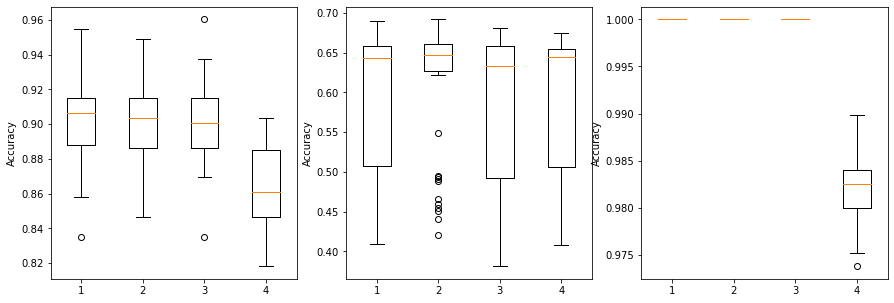

In [125]:
fig, axes = pyplot.subplots(1, 3, figsize=(15, 5))

for i in range(3):
    pyplot.sca(axes[i])
    
    if i == 0:
        mlp(ionosphere_data_x, ionosphere_data_y)
    if i == 1:
        mlp(steel_plates_data_x, steel_plates_data_y)
    if i == 2:
        mlp(bank_notes_data_x, bank_notes_data_y)

### Clustering [30 marks]

The scikit-learn library provides a suite of different clustering algorithms to choose from, each
offering a different approach to discovering the natural groups in data.
In this part of assignment, you will explore the characteristics of different clustering algorithms by testing them on three toy datasets. You will use the make blobs() function,
make classification (with ”n clusters per class=1”) and make circles (with ”noise=0.3”) to create three toy clustering datasets. Each of them will have 1, 000 examples/instances, with two
input features (for ”make classification”, ”n infomative=2”). Keep Other hyperparameters as
default, and set the seed in the dataset generators to get reproducible results.

#### Machine Learning Models:
You will be trying out the following clustering algorithms in scikit-learn:
* K-Means
* Affinity Propagation
* DBSCAN
* Gaussian Mixture Model
* BIRCH
* Agglomerative Clustering
* Mean Shift

#### Tasks:
You should:
* [ ] Fit the clustering models on the datasets and predict a cluster for each example in the
datasets. For clustering models that require specifying the number of clusters, use the
insights obtained from the three data-generating functions. Build a 7-by-3 (7 clustering
algorithms and 3 datasets) table to present the scatter plots showing the clusters generated by each algorithm.
* [ ] Write a paragraph to compare and analyse the results of the clustering algorithms on thethree datasets, highlight the characteristics 

### Making data sets

In [59]:
randomseed = 42

x1, y1 = make_blobs(n_samples = 1000, n_features = 2, random_state = randomseed)
x2, y2 = make_classification(n_samples = 1000, n_features = 2, n_informative = 2, n_clusters_per_class = 1, n_redundant = 0, random_state = randomseed)
x3, y3 = make_circles(n_samples = 1000, noise = 0.3, random_state = randomseed)

graph_list = []
x_list = [x1, x2, x3]
y_list = []

def plot_clusters(x, y, title):
    pyplot.scatter(x[:, 0], x[:, 1], c = y, s = 30, cmap = plt.cm.Paired)
    pyplot.title(title)
    graph_list.append(pyplot.gcf()) 

### K-means

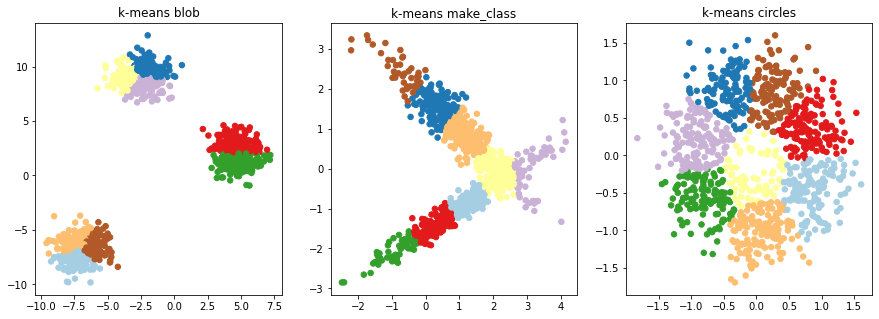

In [61]:
kmeans = KMeans(random_state=randomseed)
y1_kmeans = kmeans.fit_predict(x1)
y2_kmeans = kmeans.fit_predict(x2)
y3_kmeans = kmeans.fit_predict(x3)

y_list += [y1_kmeans, y2_kmeans, y3_kmeans]

fig, axes = pyplot.subplots(1, 3, figsize=(15, 5))

for i in range (3):
    pyplot.sca(axes[i])
        
    if i == 0:
        plot_clusters(x1, y1_kmeans, 'k-means blob')
    if i == 1:
        plot_clusters(x2, y2_kmeans, 'k-means make_class')
    if i == 2:
        plot_clusters(x3, y3_kmeans, 'k-means circles')

### Affinity propagation

C:\Users\ellio\anaconda3\lib\site-packages\sklearn\cluster\_affinity_propagation.py:246: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  warnings.warn("Affinity propagation did not converge, this model "


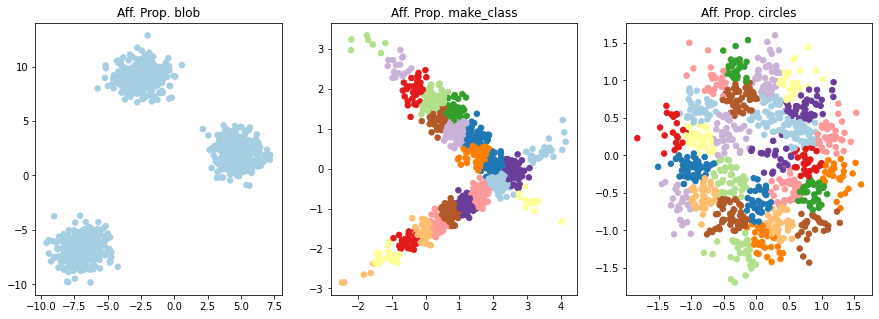

In [62]:
aprop = AffinityPropagation(random_state = randomseed)
y1_aprop = aprop.fit_predict(x1)
y2_aprop = aprop.fit_predict(x2)
y3_aprop = aprop.fit_predict(x3)

y_list += [y1_aprop, y2_aprop, y3_aprop]

fig, axes = pyplot.subplots(1, 3, figsize=(15, 5))

for i in range(3):
    pyplot.sca(axes[i])
    
    if i == 0:
        plot_clusters(x1, y1_aprop, 'Aff. Prop. blob')
    if i == 1:
        plot_clusters(x2, y2_aprop, 'Aff. Prop. make_class')
    if i == 2:
        plot_clusters(x3, y3_aprop, 'Aff. Prop. circles')

### DBSCAN

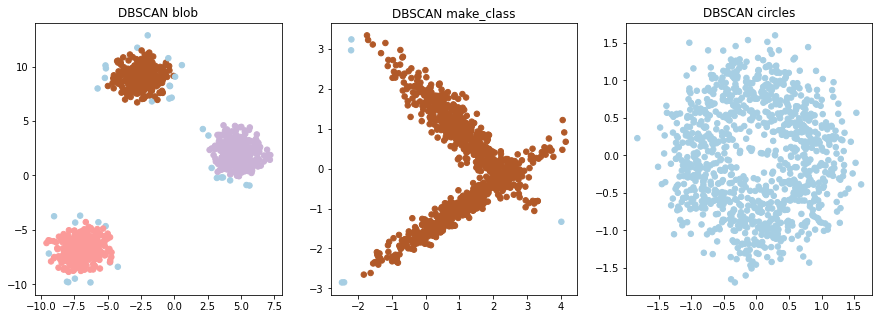

In [63]:
DBscan = DBSCAN()
y1_db = DBscan.fit_predict(x1)
y2_db = DBscan.fit_predict(x2)
y3_db = DBscan.fit_predict(x3)

y_list += [y1_db, y2_db, y3_db]

fig, axes = pyplot.subplots(1, 3, figsize=(15, 5))

for i in range(3):
    pyplot.sca(axes[i])
    
    if i == 0:
        plot_clusters(x1, y1_db, 'DBSCAN blob')
    if i == 1:
        plot_clusters(x2, y2_db, 'DBSCAN make_class')
    if i == 2:
        plot_clusters(x3, y3_db, 'DBSCAN circles')

### Gaussian Mixture Model

C:\Users\ellio\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\ellio\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\ellio\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


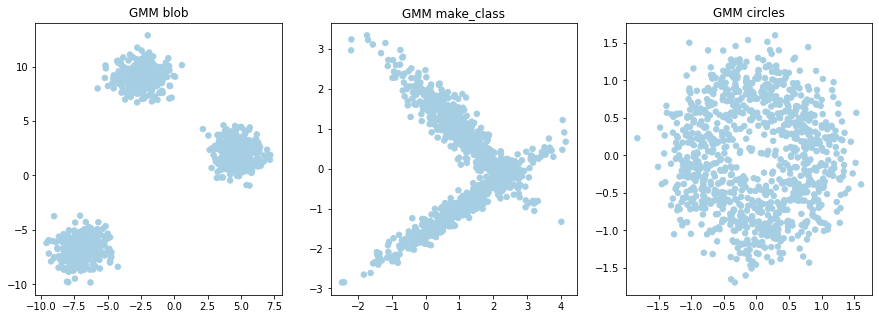

In [64]:
# Set the number of threads
os.environ['OMP_NUM_THREADS'] = '4'

randomseed = 42

GaussianMixture = GaussianMixture(random_state=randomseed)
y1_gm = GaussianMixture.fit_predict(x1)
y2_gm = GaussianMixture.fit_predict(x2)
y3_gm = GaussianMixture.fit_predict(x3)

y_list += [y1_gm, y2_gm, y3_gm]

fig, axes = pyplot.subplots(1, 3, figsize=(15, 5))

for i in range(3):
    pyplot.sca(axes[i])
    
    if i == 0:
        plot_clusters(x1, y1_gm, 'GMM blob')
    if i == 1:
        plot_clusters(x2, y2_gm, 'GMM make_class')
    if i == 2:
        plot_clusters(x3, y3_gm, 'GMM circles')

### BIRCH

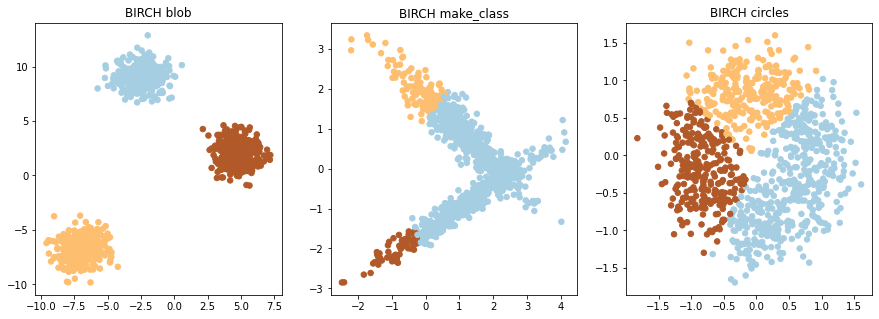

In [65]:
birch = Birch()
y1_b = birch.fit_predict(x1)
y2_b = birch.fit_predict(x2)
y3_b = birch.fit_predict(x3)

y_list += [y1_b, y2_b, y3_b]

fig, axes = pyplot.subplots(1, 3, figsize=(15, 5))

for i in range(3):
    pyplot.sca(axes[i])
    
    if i == 0:
        plot_clusters(x1, y1_b, 'BIRCH blob')
    if i == 1:
        plot_clusters(x2, y2_b, 'BIRCH make_class')
    if i == 2:
        plot_clusters(x3, y3_b, 'BIRCH circles')

### Agglomerative clustering

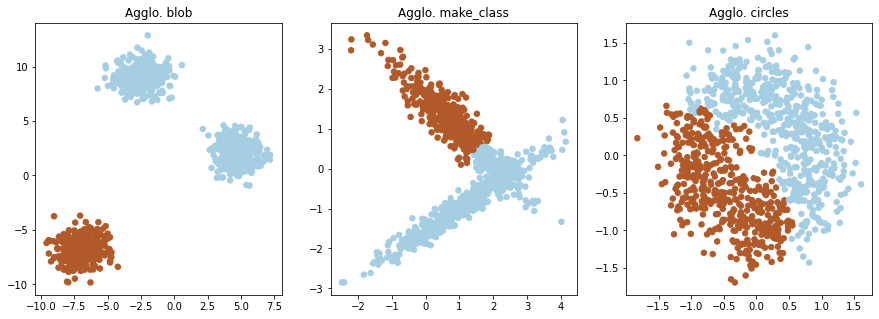

In [66]:
agg = AgglomerativeClustering()
y1_agg = agg.fit_predict(x1)
y2_agg = agg.fit_predict(x2)
y3_agg = agg.fit_predict(x3)

y_list += [y1_agg, y2_agg, y3_agg]

fig, axes = pyplot.subplots(1, 3, figsize=(15, 5))

for i in range(3):
    pyplot.sca(axes[i])
    
    if i == 0:
        plot_clusters(x1, y1_agg, 'Agglo. blob')
    if i == 1:
        plot_clusters(x2, y2_agg, 'Agglo. make_class')
    if i == 2:
        plot_clusters(x3, y3_agg, 'Agglo. circles')

### Mean Shift

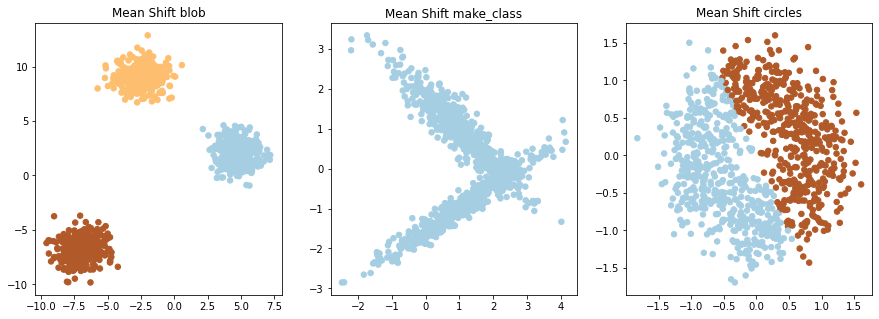

In [67]:
ms = MeanShift()
y1_ms = ms.fit_predict(x1)
y2_ms = ms.fit_predict(x2)
y3_ms = ms.fit_predict(x3)

y_list += [y1_ms, y2_ms, y3_ms]

fig, axes = pyplot.subplots(1, 3, figsize=(15, 5))

for i in range(3):
    pyplot.sca(axes[i])
    
    if i == 0:
        plot_clusters(x1, y1_ms, 'Mean Shift blob')
    if i == 1:
        plot_clusters(x2, y2_ms, 'Mean Shift make_class')
    if i == 2:
        plot_clusters(x3, y3_ms, 'Mean Shift circles')

### 7x3 table data displays

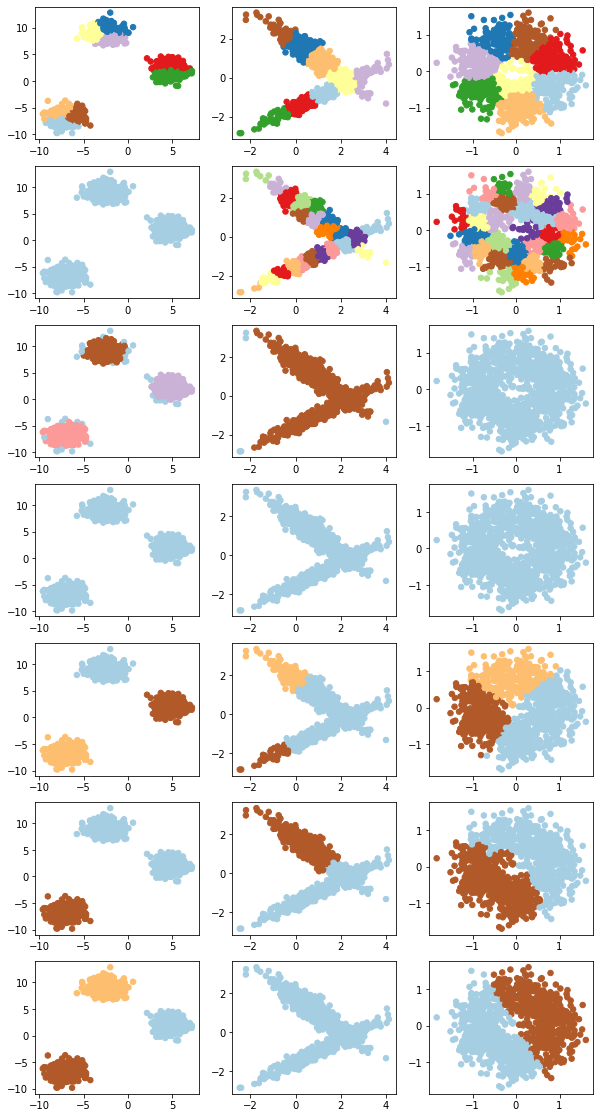

ValueError: num must be 1 <= num <= 21, not 22

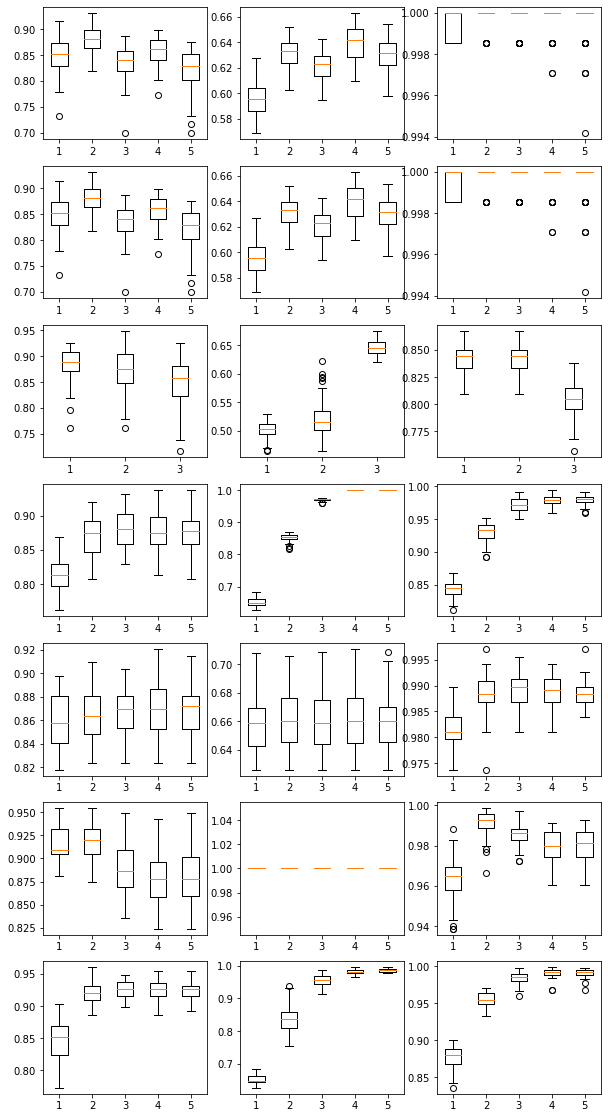

In [135]:
figure, axis = pyplot.subplots(7, 3, figsize = (10,20))
axis[0][0].set_title('Blobs')
axis[0][1].set_title('Classification')
axis[0][2].set_title('Circles')

titles = ['k-means', 'aff prop', 'DBSCAN', 'GMM', 'BIRCH', 'agglo', 'mean shift']

for i in range (0,7):
    axis[i][0].set_ylabel(titles[i])


for index, plot in enumerate(graph_list):
    x_index = index%3
    pyplot.subplot(7, 3, index + 1).scatter(x_list[x_index][:, 0], x_list[x_index][:, 1], c = y_list[index], s = 30, cmap = plt.cm.Paired)
pyplot.show()
pyplot.close()

# ==============================================================================
    # DISPLAYING PART 1 
# ==============================================================================
figure, axis = pyplot.subplots(7, 3, figsize = (10,20))
axis[0][0].set_title('iono')
axis[0][1].set_title('bank_notes')
axis[0][2].set_title('steel_plates')

titles = ['knn', 'GNB', 'Decision Tree', 'Logistic reg', 'Grad Boost', 'random forest', 'MLP']

for i in range (0,7):
    axis[i][0].set_ylabel(titles[i])

for index, plot in enumerate(resres):
    x_index = index%3
    pyplot.subplot(7, 3, index + 1).boxplot(resres[index])
pyplot.show()

errlist = [knn_mean_err, GNB_mean_err, DT_mean_err, logreg_mean_err, GB_mean_err, RF_mean_err, MLP_mean_err]
avglist = []

for i in errlist:
    sum = 0
    for val in i:
        sum += val
    avglist.append(sum/len(i))


knnstr = 'knn - ' + ', '.join(map(str, knn_mean_err)) 
gnbstr = 'gnb - ' + ', '.join(map(str, GNB_mean_err)) 
dtstr = 'DT - ' + ', '.join(map(str, DT_mean_err)) 
logregstr = 'Log Reg - ' + ', '.join(map(str, logreg_mean_err)) 
gbstr = 'GB - ' + ', '.join(map(str, GB_mean_err)) 
rfstr = 'RF - ' + ', '.join(map(str, RF_mean_err)) 
mlpstr = 'MLP - ' + ', '.join(map(str, MLP_mean_err)) 

print('         iono                steel                bank')
print(knnstr)
print(gnbstr)
print(dtstr)
print(logregstr)
print(gbstr)
print(rfstr)
print(mlpstr)
print(avglist)

In [132]:
print(len(graph_list1))

21


In [114]:
graph_list1.clear()

In [107]:
print(len(graph_list))

21
